# CSCI 4155 Machine Learning - Group Project

---
Group 13:
- [Corentin Goetghebeur](cr453043@dal.ca) - B00945496
- [Gabriel Marchand](gb614643@dal.ca) - B00929349
- [Rinchen Toh](rn835427@dal.ca) - B00944448
---

This notebook is part of a group project taking place during the fall semester of 2022 in the CSCI 4155 Machine Learning class in Dalhousie University (NS, Canada).

This project aims to compare different machine learning algorithms to detect network intrusions using the KDD Cup'99 dataset.

---

This notebook contains the classification using the Random Forest algorithm.

In [2]:
 # Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Loading the Datasets

Preprocessing and splitting of the dataset has already been done in a separate notebook.

In [3]:
# loading datasets
X_train = pd.read_csv("kdd99_training_data.csv")
X_test = pd.read_csv("kdd99_testing_data.csv")
y_train = pd.read_csv("kdd99_training_labels.csv")
y_test = pd.read_csv("kdd99_testing_labels.csv")
y_train=y_train.label.astype(str)
y_test=y_test.label.astype(str)
X_train=X_train.astype(str)
y_train=y_train.astype(str)

# X_train=X_train.sample(n=50000).astype(str)
# y_train=y_train.sample(n=50000).astype(str)
# X_test=X_test.sample(n=16666)
# y_test=y_test.sample(n=16666)
print(y_train.shape)
print(X_test.shape)
print(y_train.unique())

(370515,)
(123505, 32)
['normal' 'dos' 'r2l' 'probe' 'u2r']


## Model Training

In [4]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

## Model Evaluation

In [5]:
# Building confusion matrix and printing classification report
conf_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     97676
      normal       1.00      1.00      1.00     24482
       probe       1.00      1.00      1.00      1056
         r2l       1.00      0.98      0.99       279
         u2r       0.78      0.58      0.67        12

    accuracy                           1.00    123505
   macro avg       0.95      0.91      0.93    123505
weighted avg       1.00      1.00      1.00    123505



In [6]:
# building annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
labels = []
for i in range(5):
  for j in range(5):
    labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}"))

labels = np.asarray(labels).reshape(5, 5)

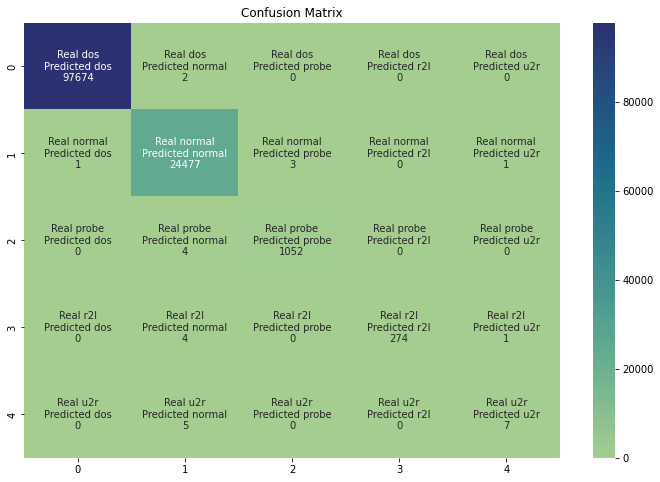

In [7]:
# confusion matrix visualization
plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='')
plt.show()

## Conclusion

Excellent overall prediction results:
- 1.00 accuracy
- 1.00 precision weighted avg
- 1.00 recall weighted avg
- 1.00 f1-score weighted avg

Very good recall on R2L: 98%

Bad recall on U2R: 58%